In [1]:
import pandas as pd
from rdkit import Chem 
from rdkit.Chem import AllChem, PandasTools, Descriptors, Draw
from rdkit.ML.Descriptors import MoleculeDescriptors

import warnings
warnings.filterwarnings("ignore")


# загрузили данные из прошлого датасета и упрощу название колонок

In [2]:
df = pd.read_csv('out.csv', index_col=0)
lis = []
for i in df.columns:
    lis.append(i.lower().replace(' ', '_'))
df.columns = lis
df
#PandasTools.AddMoleculeColumnToFrame(df,'Smiles', 'mol')


,smiles,molecular_weight,#ro5_violations,alogp,standard_value
0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,364.46,0.0,3.49,40.000000
1,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,413.90,1.0,5.19,50.000000
2,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,390.46,0.0,4.25,10000.000000
3,CC(C)CCCC(=O)c1cc(C(C)(C)C)c2c(c1)C(C)(C)CO2,316.49,1.0,5.66,4500.000000
4,COc1ccc2c(c1)c(CC(=O)NCCOC(=O)/C=C/c1ccc(N(C)C...,574.08,2.0,5.28,190.000000
...,...,...,...,...,...
6010,COc1ccc(/C=C/c2c(CC=C(C)C)c(O)cc(O)c2CC=C(C)C)...,394.51,1.0,6.00,14700.000000
6011,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...,421.45,0.0,1.85,83920.884765
6012,Nc1ccc(O)c(C(=O)O)c1,153.14,0.0,0.67,7530.000000
6013,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,261.71,0.0,4.09,880.000000


# добавили столбец с объектом-молекулой

In [3]:
mol_list = []
for smile in df['smiles']:
    mol = Chem.MolFromSmiles(smile)
    mol = Chem.AddHs(mol)
    mol_list.append(mol)
df['mol'] = mol_list
df

,smiles,molecular_weight,#ro5_violations,alogp,standard_value,mol
0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,364.46,0.0,3.49,40.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...
1,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,413.90,1.0,5.19,50.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...
2,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,390.46,0.0,4.25,10000.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...
3,CC(C)CCCC(=O)c1cc(C(C)(C)C)c2c(c1)C(C)(C)CO2,316.49,1.0,5.66,4500.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...
4,COc1ccc2c(c1)c(CC(=O)NCCOC(=O)/C=C/c1ccc(N(C)C...,574.08,2.0,5.28,190.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...
...,...,...,...,...,...,...
6010,COc1ccc(/C=C/c2c(CC=C(C)C)c(O)cc(O)c2CC=C(C)C)...,394.51,1.0,6.00,14700.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...
6011,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...,421.45,0.0,1.85,83920.884765,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...
6012,Nc1ccc(O)c(C(=O)O)c1,153.14,0.0,0.67,7530.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...
6013,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,261.71,0.0,4.09,880.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...


# нарисуем первые 8

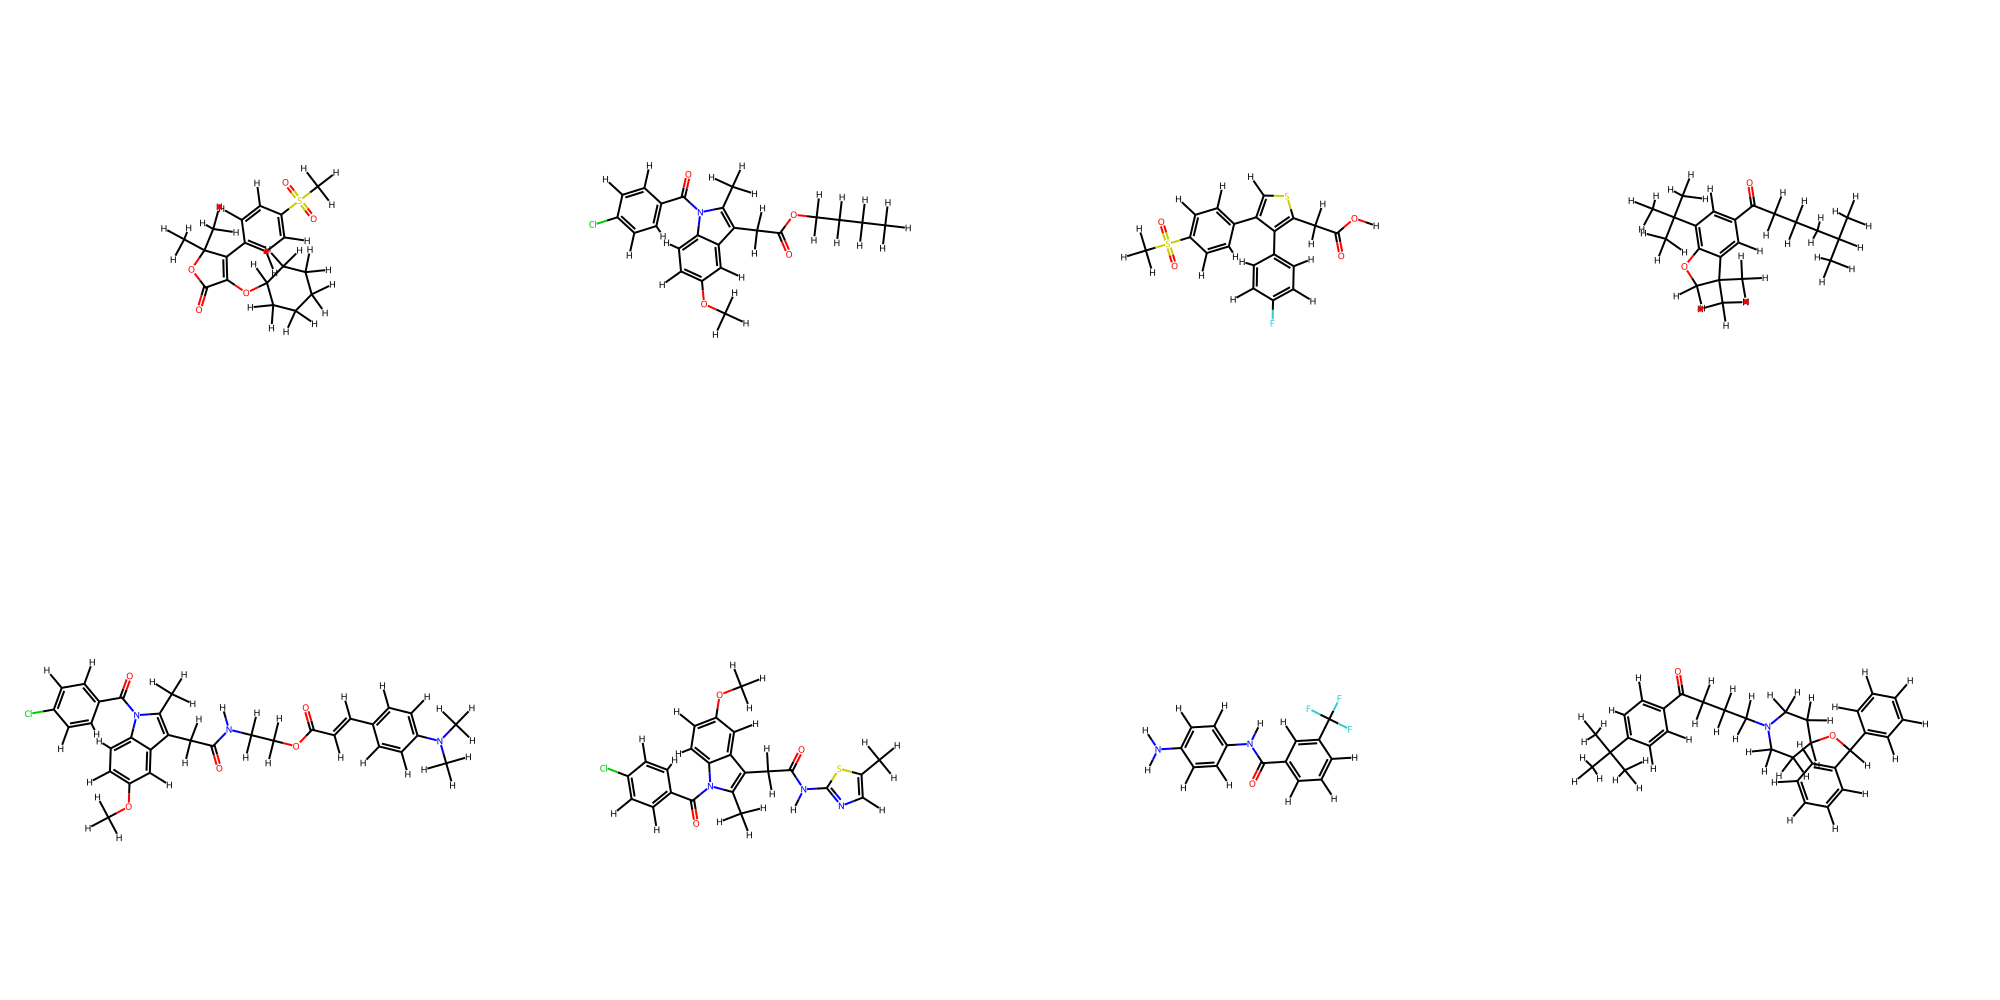

In [4]:
Draw.MolsToGridImage(df['mol'][:8], molsPerRow=4, subImgSize=(500, 500))

# Взяли дескрипторы из rdkit

In [5]:
desc_list_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)

In [6]:
desc_list_func

# Вывели имена всех дескрипторов

In [7]:
names = desc_list_func.GetDescriptorNames()
names

('MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',


In [8]:
len(names)

217

In [9]:
print(f'summary about MolLogP: ', MoleculeDescriptors.MolecularDescriptorCalculator(['MolLogP']).GetDescriptorSummaries())

des_func = MoleculeDescriptors.MolecularDescriptorCalculator(['MolLogP'])
des_func

summary about MolLogP:  ['Wildman-Crippen LogP value']


# Посчитали все 217 дескрипторов для каждой молекулы

In [10]:
lis = []
for mol in df['mol']:
    #display(Draw.MolToImage(mol))
    all_descriptors = Descriptors.CalcMolDescriptors(mol)
    lis.append(all_descriptors)

# Создали матрицу корреляций, а потом оставили в ней только верхний треугольник, чтобы потом по трешолду убрать сильно кореллированные признаки

In [11]:
import numpy as np

df1 = pd.DataFrame(lis)

df1.fillna(0, inplace=True)

corrs = df1.corr()

threshold = 0.8

upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns[::-1] if any(upper_tri[column] > threshold)] # решил идти с конца потому что как мне кажется в начале списка дескрипторов идут более популярные


df_filtered = df1.drop(columns=to_drop, axis=1)
df_filtered


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.423764,1.685672,-5.763999,0.765113,48.240000,364.463,0,0.374465,-0.482924,0.482924,...,0,0,1,0,0,0,0,0,0,0
1,14.241531,0.166985,-4.406224,0.394970,26.241379,413.901,0,0.309845,-0.496743,0.496743,...,0,0,0,0,0,0,0,0,0,0
2,14.345860,0.085018,-5.468783,0.706877,20.576923,390.457,0,0.308179,-0.480964,0.480964,...,0,0,1,0,0,0,0,1,0,0
3,14.325719,1.985134,-4.953266,0.654809,45.217391,316.485,0,0.162398,-0.492062,0.492062,...,0,0,0,0,0,0,0,0,0,0
4,14.497490,0.244642,-4.587026,0.157660,25.097561,574.077,0,0.330326,-0.496743,0.496743,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,9.117506,1.252630,-4.193021,0.397823,29.241379,394.511,0,0.293294,-0.507497,0.507497,...,0,0,0,0,0,0,0,0,0,0
6010,14.242791,0.043682,-4.109028,0.486542,35.387097,421.453,0,0.342676,-0.507598,0.507598,...,0,0,0,0,0,0,0,0,0,0
6011,11.273745,0.113930,-1.376065,0.408716,17.272727,153.137,0,0.339048,-0.507050,0.507050,...,0,0,0,0,0,0,0,0,0,0
6012,12.042649,0.053079,-3.091017,0.874855,20.055556,261.708,0,0.337310,-0.477583,0.477583,...,0,0,0,0,0,0,0,0,0,0


# если значение в столбце одно и то же то зачем оно нам

In [12]:
list_with_similar_values_in_col = []
for i in df_filtered.columns:
    if len(df_filtered[[i]].value_counts()) == 1:
        list_with_similar_values_in_col.append(i)


In [13]:
df_with_descr = df_filtered.drop(columns=list_with_similar_values_in_col, axis=1)

In [14]:
df.reset_index(inplace=True)
df_with_descr.reset_index(inplace=True)

In [15]:
res_df = pd.concat([df, df_with_descr], axis=1)

In [16]:
res_df.drop(['index'], inplace=True, axis=1)
res_df

,smiles,molecular_weight,#ro5_violations,alogp,standard_value,mol,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,364.46,0.0,3.49,40.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,13.423764,1.685672,-5.763999,0.765113,...,0,0,0,1,0,0,0,0,0,0
1,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,413.90,1.0,5.19,50.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,14.241531,0.166985,-4.406224,0.394970,...,0,0,0,0,0,0,0,0,0,0
2,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,390.46,0.0,4.25,10000.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,14.345860,0.085018,-5.468783,0.706877,...,0,0,0,1,0,0,0,0,1,0
3,CC(C)CCCC(=O)c1cc(C(C)(C)C)c2c(c1)C(C)(C)CO2,316.49,1.0,5.66,4500.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,14.325719,1.985134,-4.953266,0.654809,...,0,0,0,0,0,0,0,0,0,0
4,COc1ccc2c(c1)c(CC(=O)NCCOC(=O)/C=C/c1ccc(N(C)C...,574.08,2.0,5.28,190.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,14.497490,0.244642,-4.587026,0.157660,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,COc1ccc(/C=C/c2c(CC=C(C)C)c(O)cc(O)c2CC=C(C)C)...,394.51,1.0,6.00,14700.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,9.117506,1.252630,-4.193021,0.397823,...,0,0,0,0,0,0,0,0,0,0
6010,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...,421.45,0.0,1.85,83920.884765,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,14.242791,0.043682,-4.109028,0.486542,...,0,0,0,0,0,0,0,0,0,0
6011,Nc1ccc(O)c(C(=O)O)c1,153.14,0.0,0.67,7530.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,11.273745,0.113930,-1.376065,0.408716,...,0,0,0,0,0,0,0,0,0,0
6012,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,261.71,0.0,4.09,880.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,12.042649,0.053079,-3.091017,0.874855,...,0,0,0,0,0,0,0,0,0,0


In [17]:
res_df1 = res_df.copy()

# Далее Возьмём ещё одни дескрипторы 

In [19]:
from mordred import Calculator, descriptors
calc = Calculator(descriptors, ignore_3D=False)

df_mordred = calc.pandas(res_df['mol'])

  1%|          | 67/6014 [00:04<07:39, 12.94it/s] 

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  4%|▍         | 253/6014 [00:10<04:16, 22.46it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 22%|██▏       | 1302/6014 [00:29<01:03, 73.78it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 28%|██▊       | 1706/6014 [00:38<03:53, 18.45it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 30%|███       | 1814/6014 [00:41<02:55, 23.93it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 39%|███▉      | 2341/6014 [00:52<01:41, 36.35it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 42%|████▏     | 2528/6014 [00:56<02:46, 20.88it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 57%|█████▋    | 3456/6014 [01:13<00:43, 59.39it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 59%|█████▉    | 3576/6014 [01:15<00:39, 61.45it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 66%|██████▌   | 3957/6014 [01:22<00:35, 57.79it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 89%|████████▉ | 5360/6014 [02:00<00:13, 47.25it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 94%|█████████▍| 5677/6014 [02:07<00:05, 57.08it/s]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 6014/6014 [02:15<00:00, 44.30it/s]


In [20]:
df_mordred.dtypes.value_counts()

object     1055
float64     461
int64       308
bool          2
Name: count, dtype: int64

In [21]:
df_mordred = df_mordred.select_dtypes(include='number')


In [22]:
corrs = df_mordred.corr()

threshold = 0.8

upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns[::-1] if any(upper_tri[column] > threshold)] # решил идти с конца потому что как мне кажется в начале списка дескрипторов идут более популярные


df_filtered_mord = df_mordred.drop(columns=to_drop, axis=1)
df_filtered_mord

,nAcid,nBase,nAromAtom,nAtom,nSpiro,nBridgehead,nHetero,nB,nN,nO,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,Diameter,TopoShapeIndex,WPath
0,0,0,6,49,0,0,6,0,0,5,...,0.040614,0.033349,0.022068,0.019905,0.011665,0.011875,0.010101,12,1.000000,1478
1,0,0,15,53,0,0,6,0,1,4,...,0.046208,0.032819,0.018910,0.015313,0.011976,0.006887,0.008903,15,0.875000,2264
2,1,0,17,41,0,0,7,0,0,4,...,0.038611,0.030724,0.020574,0.017835,0.020496,0.011118,0.013350,12,1.000000,1670
3,0,0,6,55,0,0,2,0,0,2,...,0.050588,0.054338,0.014749,0.015029,0.014272,0.022043,0.002857,10,1.000000,1179
4,0,0,21,73,0,0,9,0,3,5,...,0.044390,0.031548,0.018553,0.013535,0.010708,0.007536,0.007397,23,0.916667,7068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,0,0,12,59,0,0,4,0,0,4,...,0.043069,0.032012,0.017711,0.015708,0.012869,0.011504,0.008424,13,0.857143,2318
6010,0,1,16,54,0,0,8,0,3,5,...,0.056186,0.031646,0.023033,0.018326,0.015512,0.011308,0.010354,13,0.857143,2485
6011,1,0,6,18,0,0,4,0,1,3,...,0.065333,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,5,0.666667,148
6012,1,0,12,30,0,0,4,0,1,2,...,0.043434,0.027778,0.019334,0.015162,0.010204,0.000000,0.000000,8,1.000000,602


In [23]:
list_with_similar_values_in_col = []

for i in df_filtered_mord.columns:
    if len(df_filtered_mord[[i]].value_counts()) == 1:
        list_with_similar_values_in_col.append(i)
        
df_filtered_mord = df_filtered_mord.drop(columns=list_with_similar_values_in_col, axis=1)

In [24]:
res_df2 = pd.concat([df, df_filtered_mord], axis=1)
res_df2 = res_df2.drop(columns=['index'], axis=1)

In [25]:
res_df2

,smiles,molecular_weight,#ro5_violations,alogp,standard_value,mol,nAcid,nBase,nAromAtom,nAtom,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,Diameter,TopoShapeIndex,WPath
0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,364.46,0.0,3.49,40.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,0,0,6,49,...,0.040614,0.033349,0.022068,0.019905,0.011665,0.011875,0.010101,12,1.000000,1478
1,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,413.90,1.0,5.19,50.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,0,0,15,53,...,0.046208,0.032819,0.018910,0.015313,0.011976,0.006887,0.008903,15,0.875000,2264
2,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,390.46,0.0,4.25,10000.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,1,0,17,41,...,0.038611,0.030724,0.020574,0.017835,0.020496,0.011118,0.013350,12,1.000000,1670
3,CC(C)CCCC(=O)c1cc(C(C)(C)C)c2c(c1)C(C)(C)CO2,316.49,1.0,5.66,4500.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,0,0,6,55,...,0.050588,0.054338,0.014749,0.015029,0.014272,0.022043,0.002857,10,1.000000,1179
4,COc1ccc2c(c1)c(CC(=O)NCCOC(=O)/C=C/c1ccc(N(C)C...,574.08,2.0,5.28,190.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,0,0,21,73,...,0.044390,0.031548,0.018553,0.013535,0.010708,0.007536,0.007397,23,0.916667,7068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,COc1ccc(/C=C/c2c(CC=C(C)C)c(O)cc(O)c2CC=C(C)C)...,394.51,1.0,6.00,14700.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,0,0,12,59,...,0.043069,0.032012,0.017711,0.015708,0.012869,0.011504,0.008424,13,0.857143,2318
6010,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...,421.45,0.0,1.85,83920.884765,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,0,1,16,54,...,0.056186,0.031646,0.023033,0.018326,0.015512,0.011308,0.010354,13,0.857143,2485
6011,Nc1ccc(O)c(C(=O)O)c1,153.14,0.0,0.67,7530.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,1,0,6,18,...,0.065333,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,5,0.666667,148
6012,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,261.71,0.0,4.09,880.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,1,0,12,30,...,0.043434,0.027778,0.019334,0.015162,0.010204,0.000000,0.000000,8,1.000000,602


# Добавим два списка fingerprints (MACCS, Morgan)

In [28]:
from rdkit.Chem import MACCSkeys

def maccs_fp(mol):
   fp = MACCSkeys.GenMACCSKeys(mol)
   numpy_array_1 = np.zeros((1,), dtype=int)
   Chem.DataStructs.ConvertToNumpyArray(fp, numpy_array_1)
   return numpy_array_1
   
temp1 = df['mol'].apply(maccs_fp)
temp1.rename('MACCS_fp', inplace=True)

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
6009    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6010    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6011    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6012    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6013    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: MACCS_fp, Length: 6014, dtype: object

In [32]:
def morgan_fp(mol):
   morgan = AllChem.GetMorganGenerator(radius=2, fpSize=512)
   fp = morgan.GetFingerprint(mol)
   numpy_array_1 = np.zeros((1,), dtype=int)
   Chem.DataStructs.ConvertToNumpyArray(fp, numpy_array_1)
   return numpy_array_1

temp2 = df['mol'].apply(morgan_fp)
temp2.rename('morgan_fp', inplace=True)

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
1       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
4       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
6009    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6010    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6011    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6012    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6013    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
Name: morgan_fp, Length: 6014, dtype: object

In [33]:
finger_df = pd.concat([df, temp1, temp2], axis=1)
finger_df.drop(columns=['index'], inplace=True, axis=1)
finger_df

,smiles,molecular_weight,#ro5_violations,alogp,standard_value,mol,MACCS_fp,morgan_fp
0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,364.46,0.0,3.49,40.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,413.90,1.0,5.19,50.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,390.46,0.0,4.25,10000.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CC(C)CCCC(=O)c1cc(C(C)(C)C)c2c(c1)C(C)(C)CO2,316.49,1.0,5.66,4500.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,COc1ccc2c(c1)c(CC(=O)NCCOC(=O)/C=C/c1ccc(N(C)C...,574.08,2.0,5.28,190.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
6009,COc1ccc(/C=C/c2c(CC=C(C)C)c(O)cc(O)c2CC=C(C)C)...,394.51,1.0,6.00,14700.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6010,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...,421.45,0.0,1.85,83920.884765,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6011,Nc1ccc(O)c(C(=O)O)c1,153.14,0.0,0.67,7530.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6012,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,261.71,0.0,4.09,880.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [35]:

res_df1.to_csv('data1.csv', index=False)
res_df2.to_csv('data2.csv', index=False)
finger_df.to_csv('data3.csv', index=False)
